### Выполнил: Мозговой Никита, группа 309

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Реализуем логистическую регрессию 

In [7]:
class LinearClassifier:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_output)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_output)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

Загрузим и посмотрим на данные 

In [13]:
df = pd.read_csv('train.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [18]:
df.shape

(11017, 36)

Удалим дубликаты и посмотрим как изменилась таблица

In [21]:
new_df = df.drop_duplicates()

In [23]:
new_df.shape

(10001, 36)

Заполним пропуски категориальных и числовых элементов

In [28]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
categorical_columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
new_df.loc[:, categorical_columns] = imputer.fit_transform(new_df[categorical_columns])

In [32]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
numeric_columns = ['CreditScore', 'LoanAmount', 'MonthlyDebtPayments', 'CheckingAccountBalance', 'TotalAssets', 'NetWorth', 'BaseInterestRate', 'BankruptcyHistory']
new_df.loc[:, numeric_columns] = imputer.fit_transform(new_df[numeric_columns].values)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10000
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10000 non-null  object 
 1   Age                         10000 non-null  float64
 2   AnnualIncome                10000 non-null  float64
 3   CreditScore                 10001 non-null  float64
 4   LoanAmount                  10001 non-null  float64
 5   LoanDuration                10000 non-null  float64
 6   MaritalStatus               10001 non-null  object 
 7   NumberOfDependents          10000 non-null  float64
 8   HomeOwnershipStatus         10001 non-null  object 
 9   MonthlyDebtPayments         10001 non-null  float64
 10  CreditCardUtilizationRate   10000 non-null  float64
 11  NumberOfOpenCreditLines     10000 non-null  float64
 12  NumberOfCreditInquiries     10000 non-null  float64
 13  DebtToIncomeRatio           10000 no

In [36]:
new_df = new_df.dropna()

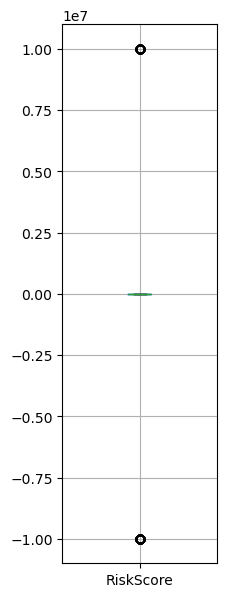

In [56]:
new_df.boxplot(column=['RiskScore'], figsize = (2, 7))
plt.show()

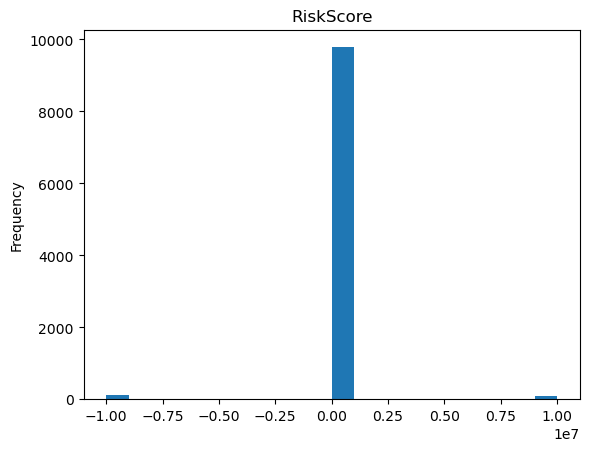

In [54]:
new_df['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

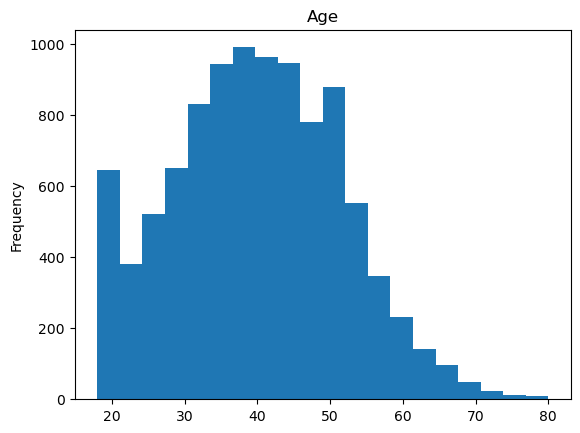

In [58]:
new_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

In [60]:
new_df = new_df[new_df['RiskScore'] < new_df['RiskScore'].quantile(0.99)] # and new_df['RiskScore'] > new_df['RiskScore'].quantile(0.01)]
new_df = new_df[new_df['RiskScore'] > new_df['RiskScore'].quantile(0.01)]

new_df = new_df[new_df['Age'] > new_df['Age'].quantile(0.01)]

Немного почистили данные, а точнее удалили некие выбросы

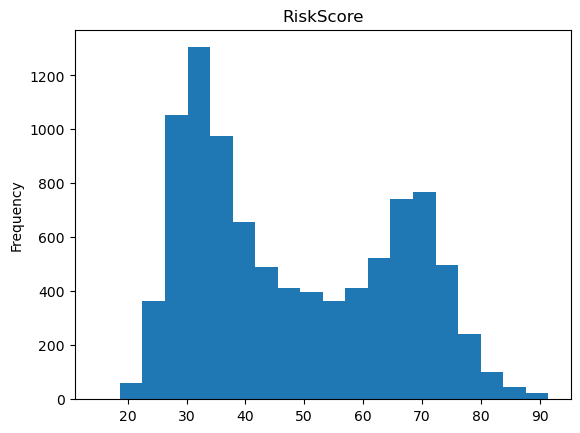

In [65]:
new_df['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

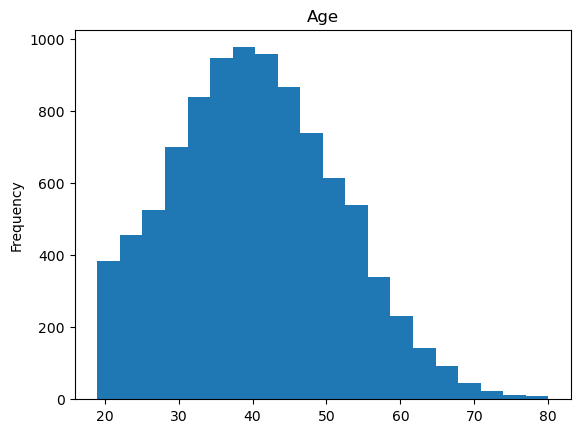

In [67]:
new_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9437 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9437 non-null   object 
 1   Age                         9437 non-null   float64
 2   AnnualIncome                9437 non-null   float64
 3   CreditScore                 9437 non-null   float64
 4   LoanAmount                  9437 non-null   float64
 5   LoanDuration                9437 non-null   float64
 6   MaritalStatus               9437 non-null   object 
 7   NumberOfDependents          9437 non-null   float64
 8   HomeOwnershipStatus         9437 non-null   object 
 9   MonthlyDebtPayments         9437 non-null   float64
 10  CreditCardUtilizationRate   9437 non-null   float64
 11  NumberOfOpenCreditLines     9437 non-null   float64
 12  NumberOfCreditInquiries     9437 non-null   float64
 13  DebtToIncomeRatio           9437 non-n

In [91]:
new_copy_df = new_df.copy()
new_copy_df['EmploymentStatus'] = LabelEncoder().fit_transform(new_copy_df['EmploymentStatus'])
new_copy_df['EducationLevel'] = LabelEncoder().fit_transform(new_copy_df['EducationLevel'])

new_copy_df['MaritalStatus'] = TargetEncoder().fit_transform(
    new_copy_df['MaritalStatus'].values.reshape(-1, 1),
    new_copy_df['RiskScore'].values
    )

new_copy_df['HomeOwnershipStatus'] = TargetEncoder().fit_transform(
     new_copy_df['HomeOwnershipStatus'].values.reshape(-1, 1),
     new_copy_df['RiskScore'].values
     )

new_copy_df['LoanPurpose'] = TargetEncoder().fit_transform(
     new_copy_df['LoanPurpose'].values.reshape(-1, 1),
     new_copy_df['RiskScore'].values
     )

In [95]:
correlation_matrix = new_copy_df.drop(['ApplicationDate', 'RiskScore'], axis=1).corr()

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

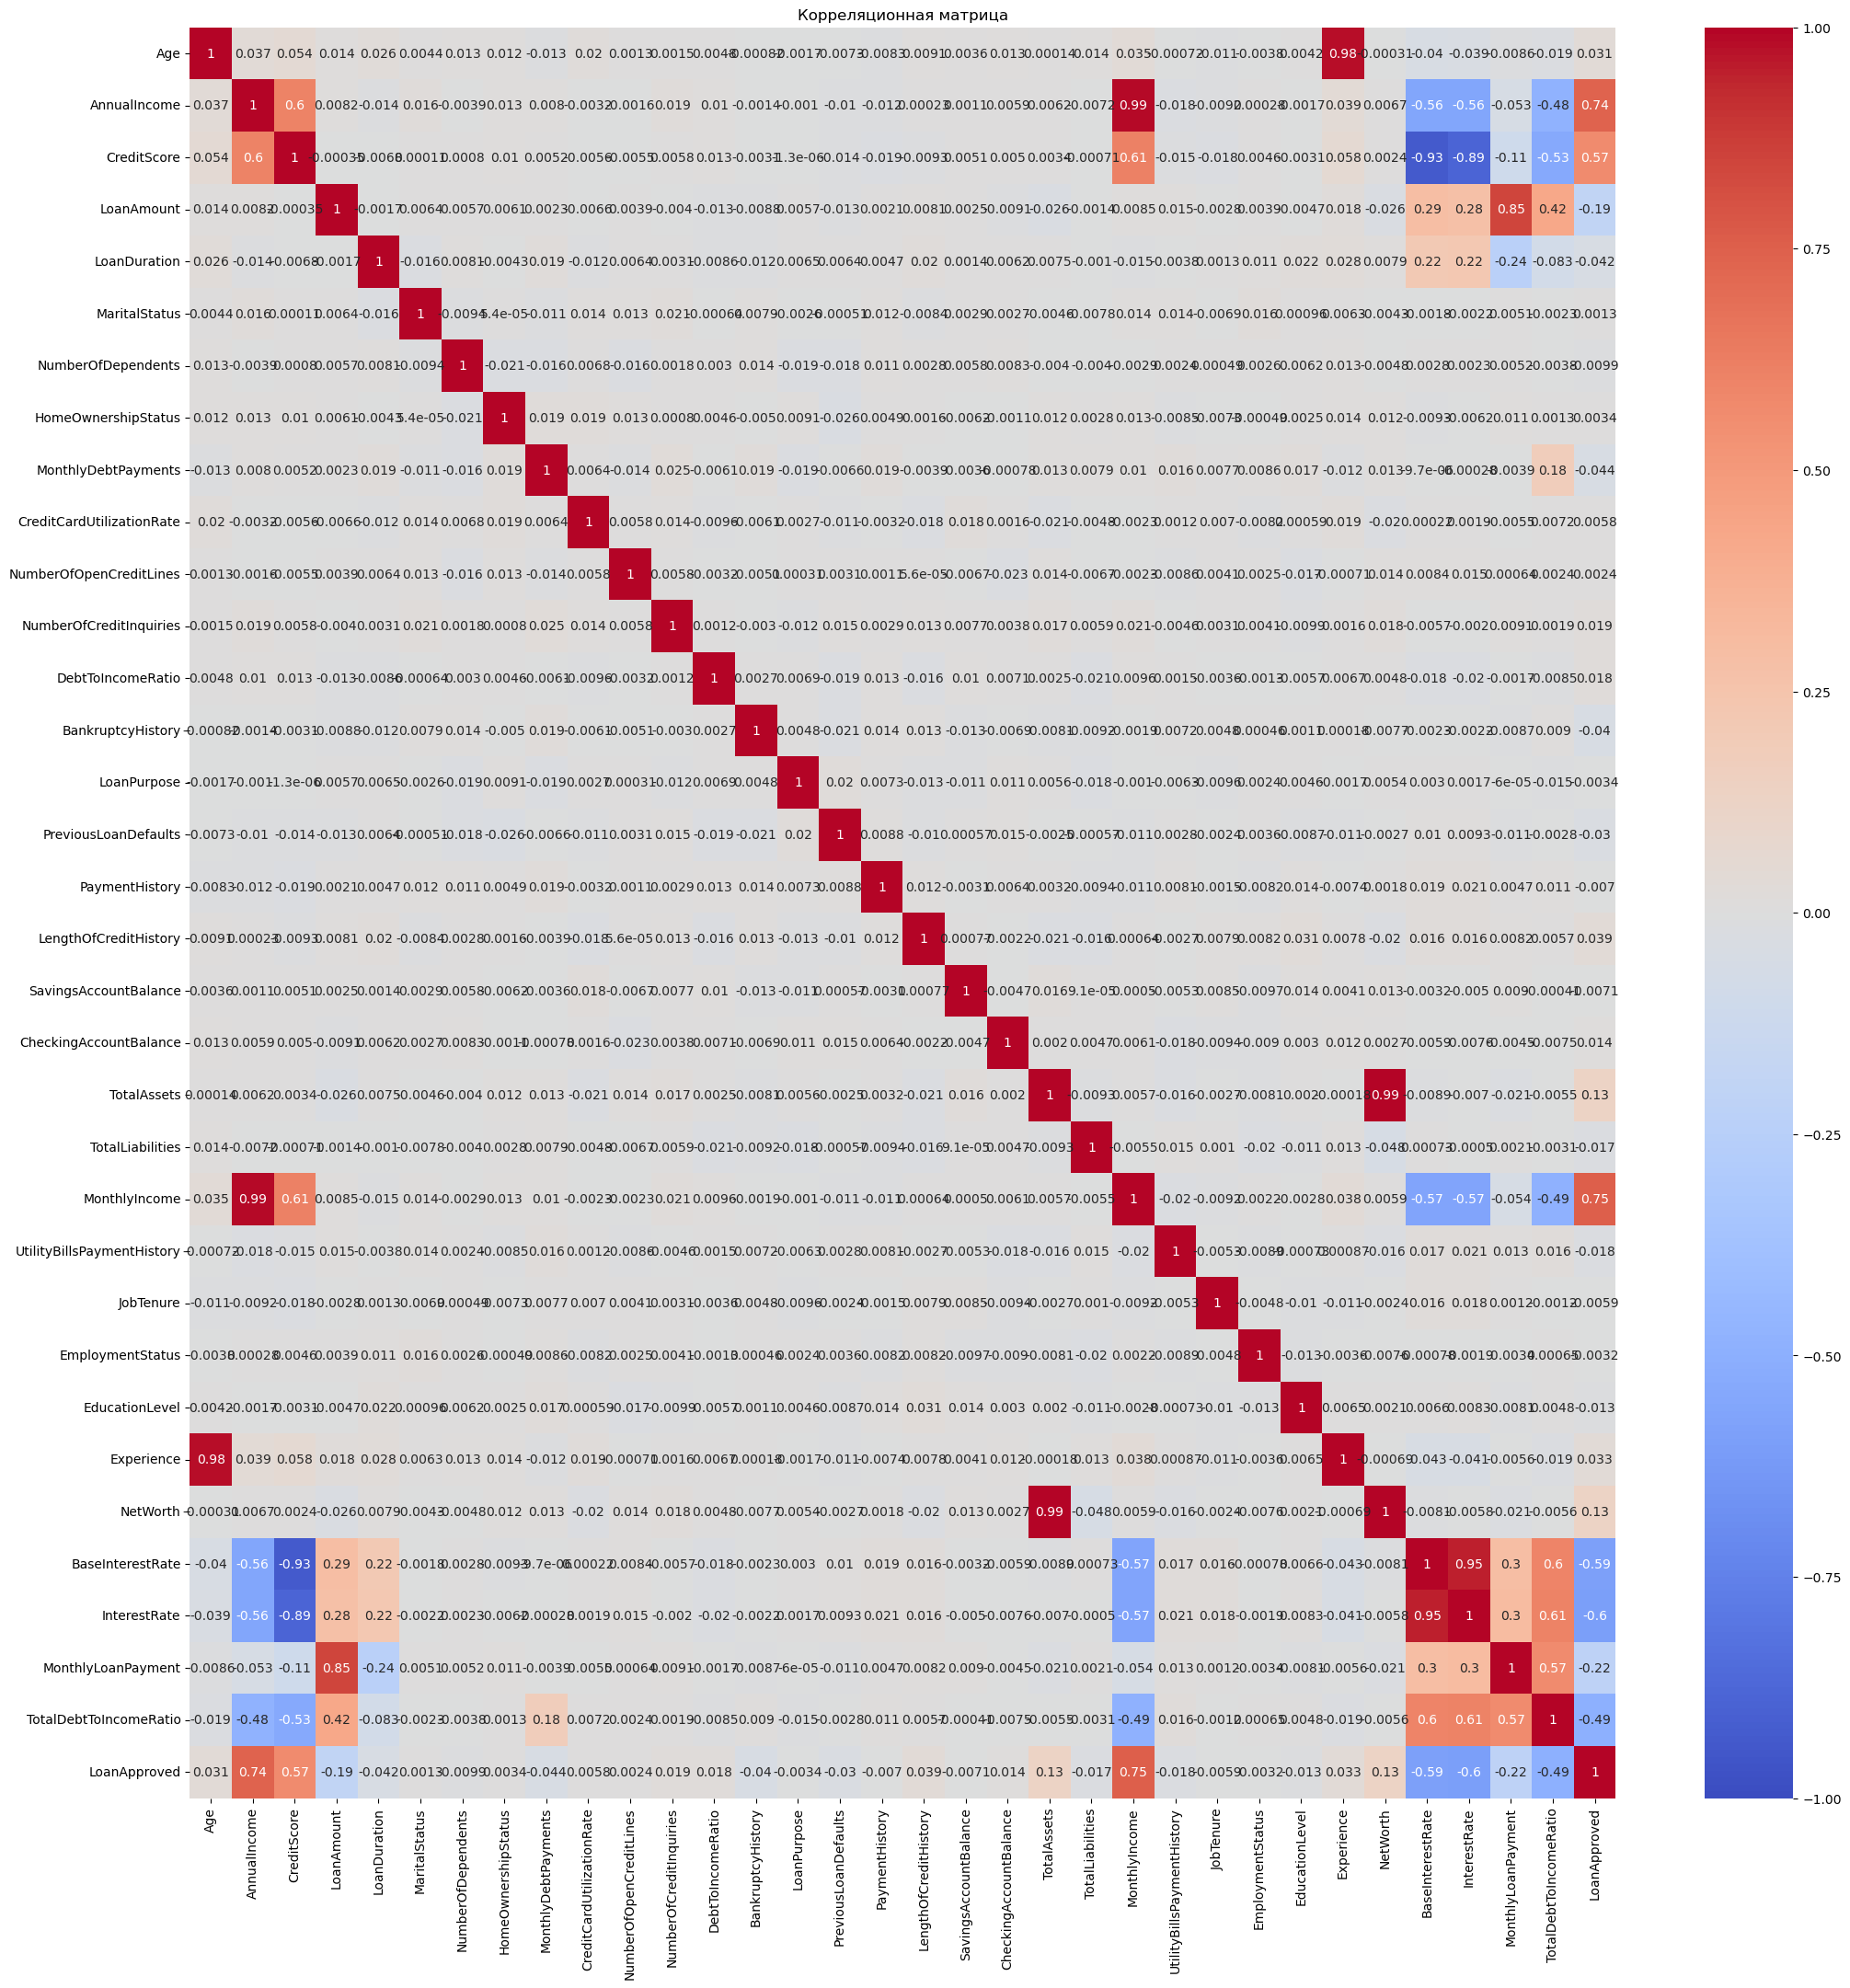

In [97]:
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [99]:
new_df.drop(['Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment'], axis=1, inplace=True)
     

In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9437 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9437 non-null   object 
 1   Age                         9437 non-null   float64
 2   AnnualIncome                9437 non-null   float64
 3   CreditScore                 9437 non-null   float64
 4   LoanAmount                  9437 non-null   float64
 5   LoanDuration                9437 non-null   float64
 6   MaritalStatus               9437 non-null   object 
 7   NumberOfDependents          9437 non-null   float64
 8   HomeOwnershipStatus         9437 non-null   object 
 9   MonthlyDebtPayments         9437 non-null   float64
 10  CreditCardUtilizationRate   9437 non-null   float64
 11  NumberOfOpenCreditLines     9437 non-null   float64
 12  NumberOfCreditInquiries     9437 non-null   float64
 13  DebtToIncomeRatio           9437 non-n

Произведем необходимые трансформации

In [104]:
new_df['MaritalStatus'] = new_df['MaritalStatus'].astype('category').cat.codes
new_df['HomeOwnershipStatus'] = new_df['HomeOwnershipStatus'].astype('category').cat.codes
new_df['LoanPurpose'] = new_df['LoanPurpose'].astype('category').cat.codes
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].astype('category').cat.codes
new_df['EducationLevel'] = new_df['EducationLevel'].astype('category').cat.codes

In [106]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9437 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9437 non-null   object 
 1   Age                         9437 non-null   float64
 2   AnnualIncome                9437 non-null   float64
 3   CreditScore                 9437 non-null   float64
 4   LoanAmount                  9437 non-null   float64
 5   LoanDuration                9437 non-null   float64
 6   MaritalStatus               9437 non-null   int8   
 7   NumberOfDependents          9437 non-null   float64
 8   HomeOwnershipStatus         9437 non-null   int8   
 9   MonthlyDebtPayments         9437 non-null   float64
 10  CreditCardUtilizationRate   9437 non-null   float64
 11  NumberOfOpenCreditLines     9437 non-null   float64
 12  NumberOfCreditInquiries     9437 non-null   float64
 13  DebtToIncomeRatio           9437 non-n

In [110]:
new_df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,0,1.0,3,1095.0,...,50072.0,15005.0,0.908289,4.0,0,0,0.251465,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,3,1.0,0,211.0,...,91878.0,64877.0,0.797339,2.0,0,3,0.093173,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,1,0.0,0,546.0,...,292300.0,13918.0,0.915945,3.0,0,1,0.115443,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,1,0.0,1,153.0,...,13070.0,3846.0,0.876416,3.0,0,3,0.112822,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2,2.0,3,562.0,...,33357.0,351603.0,0.888689,5.0,0,1,0.089037,0.052721,1.0,31.347091


In [140]:
new_df_copy = new_df
new_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9437 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9437 non-null   object 
 1   Age                         9437 non-null   float64
 2   AnnualIncome                9437 non-null   float64
 3   CreditScore                 9437 non-null   float64
 4   LoanAmount                  9437 non-null   float64
 5   LoanDuration                9437 non-null   float64
 6   MaritalStatus               9437 non-null   int8   
 7   NumberOfDependents          9437 non-null   float64
 8   HomeOwnershipStatus         9437 non-null   int8   
 9   MonthlyDebtPayments         9437 non-null   float64
 10  CreditCardUtilizationRate   9437 non-null   float64
 11  NumberOfOpenCreditLines     9437 non-null   float64
 12  NumberOfCreditInquiries     9437 non-null   float64
 13  DebtToIncomeRatio           9437 non-n

In [116]:
features = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
        'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
        'HomeOwnershipStatus', 'MonthlyDebtPayments',
        'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
        'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
        'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
        'LengthOfCreditHistory', 'SavingsAccountBalance',
        'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
        'UtilityBillsPaymentHistory', 'JobTenure',
        'EmploymentStatus', 'EducationLevel','InterestRate', 
        'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
x = new_df.loc[:, features].values

minMaxScaler = MinMaxScaler()
xScaled = minMaxScaler.fit_transform(x)
new_df_norm = pd.DataFrame(xScaled)

In [118]:
new_df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.131148,0.070732,0.452727,0.038827,0.444444,0.000000,0.166667,1.000000,0.099577,0.162179,...,0.004357,0.001659,0.882185,0.235294,0.0,0.00,0.260327,0.011566,0.0,0.669844
1,0.590164,0.214461,1.000000,0.036003,0.222222,1.000000,0.166667,0.000000,0.018222,0.188223,...,0.008060,0.007202,0.731368,0.117647,0.0,0.75,0.059214,0.001826,1.0,0.178168
2,0.524590,0.388944,1.000000,0.089423,0.222222,0.333333,0.000000,0.000000,0.049052,0.483642,...,0.025814,0.001538,0.892594,0.176471,0.0,0.25,0.087509,0.002728,1.0,0.256359
3,0.098361,0.026862,0.994545,0.043363,0.333333,0.333333,0.000000,0.333333,0.012884,0.202240,...,0.001079,0.000419,0.838861,0.176471,0.0,0.75,0.084178,0.008998,1.0,0.287971
4,0.590164,0.388944,1.000000,0.070284,0.333333,0.666667,0.333333,1.000000,0.050525,0.295596,...,0.002876,0.039071,0.855543,0.294118,0.0,0.25,0.053960,0.001914,1.0,0.215374


In [124]:
x = StandardScaler().fit_transform(x)
new_df_stand = pd.DataFrame(data = x, columns = features)
new_df_stand.head()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,InterestRate,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,-1.240078,-0.563822,-0.761550,-0.469294,0.274640,-1.633581,-0.402398,1.236718,1.116088,-0.836253,...,-0.290018,-0.259753,1.006928,-0.437650,-0.369538,-1.405843,0.542434,-0.259535,-1.031983,1.045941
1,1.304976,0.346413,1.003288,-0.513669,-0.707466,2.247940,-0.402398,-1.108250,-0.683209,-0.687157,...,-0.198353,-0.020467,0.105856,-1.342879,-0.369538,0.860202,-1.108569,-0.538622,0.969008,-1.148536
2,0.941397,1.451412,1.003288,0.325929,-0.707466,-0.339741,-1.105495,-1.108250,-0.001349,1.004042,...,0.241099,-0.264969,1.069113,-0.890264,-0.369538,-0.650494,-0.876284,-0.512779,0.969008,-0.799548
3,-1.421867,-0.841651,0.985698,-0.397992,-0.216413,-0.339741,-1.105495,-0.326594,-0.801263,-0.606915,...,-0.371150,-0.313295,0.748080,-0.890264,-0.369538,0.860202,-0.903630,-0.333117,0.969008,-0.658456
4,1.304976,1.451412,1.003288,0.025116,-0.216413,0.954099,0.300699,1.236718,0.031217,-0.072476,...,-0.326668,1.355249,0.847748,0.014964,-0.369538,-0.650494,-1.151704,-0.536111,0.969008,-0.982477


In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df_copy.drop(['ApplicationDate', 'LoanApproved'], axis=1),
    new_df_copy['LoanApproved'],
    test_size=0.2,
    random_state=42
)

/home/mgorohow/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 3857, number of negative: 3692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3761
[LightGBM] [Info] Number of data points in the train set: 7549, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510929 -> initscore=0.043721
[LightGBM] [Info] Start training from score 0.043721


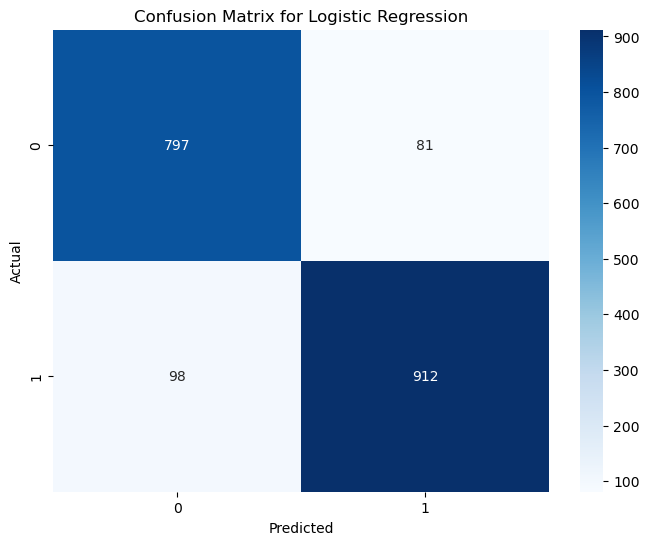

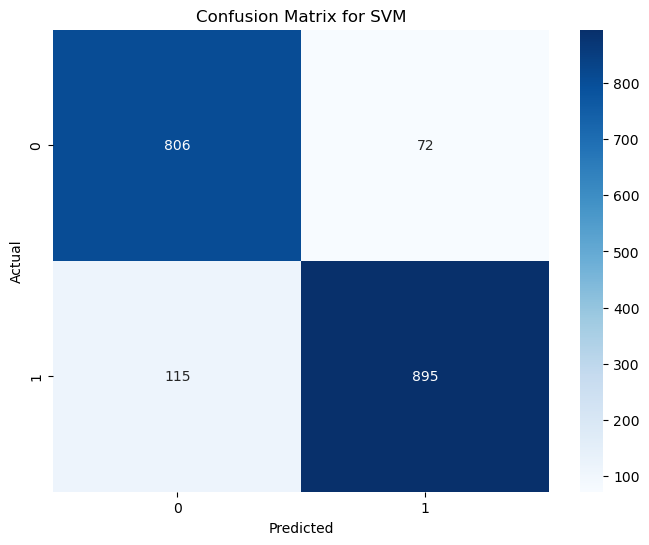

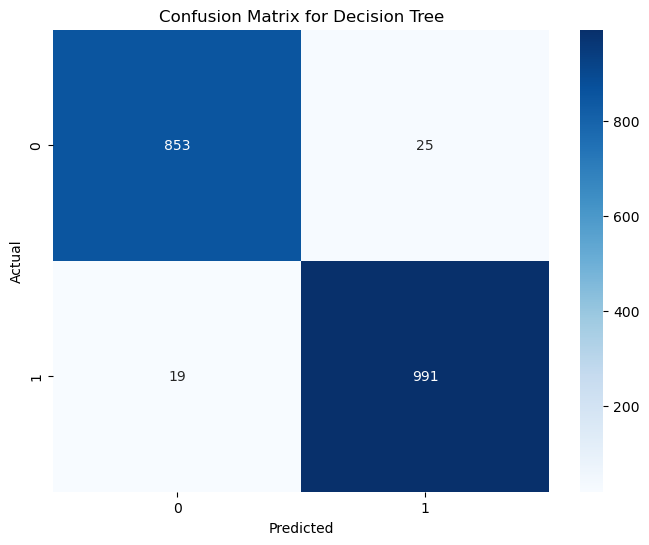

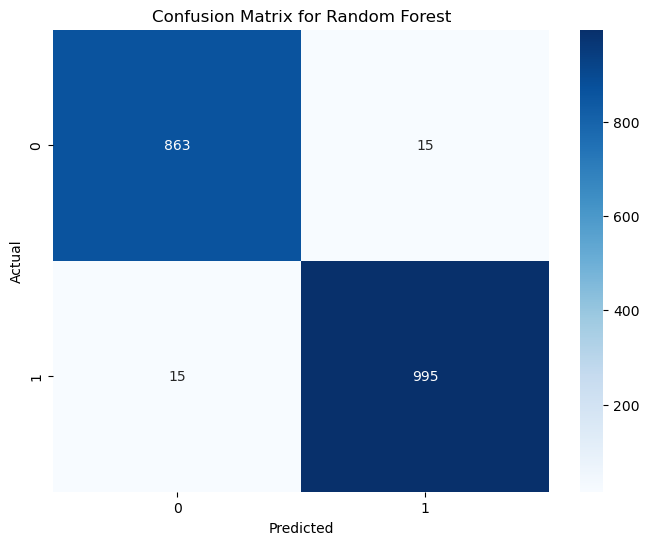

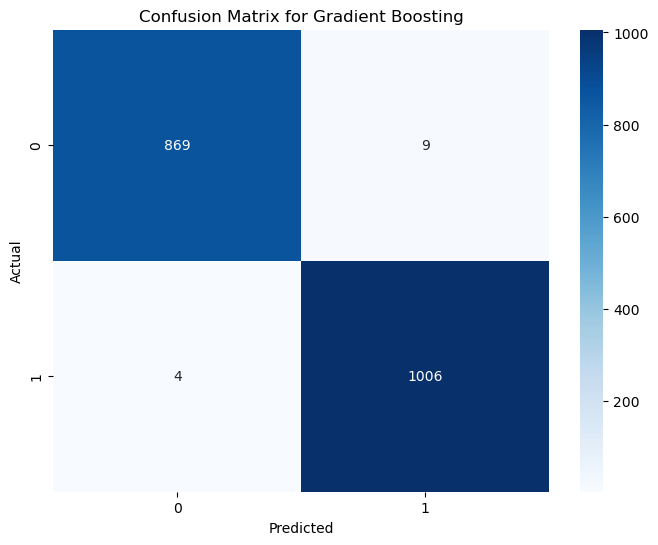

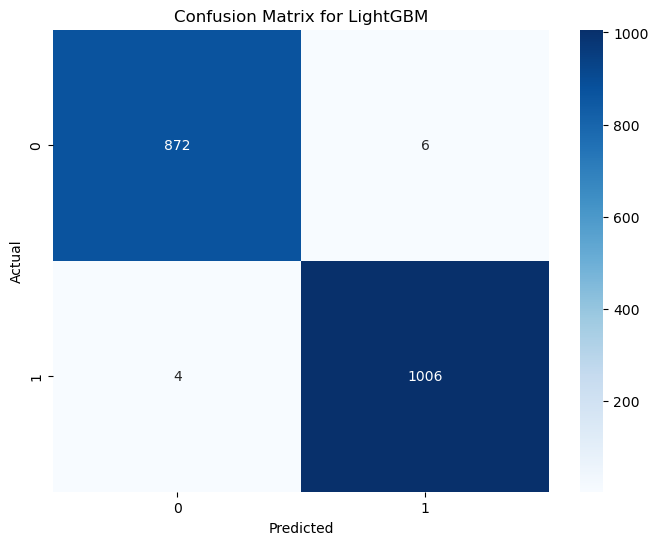

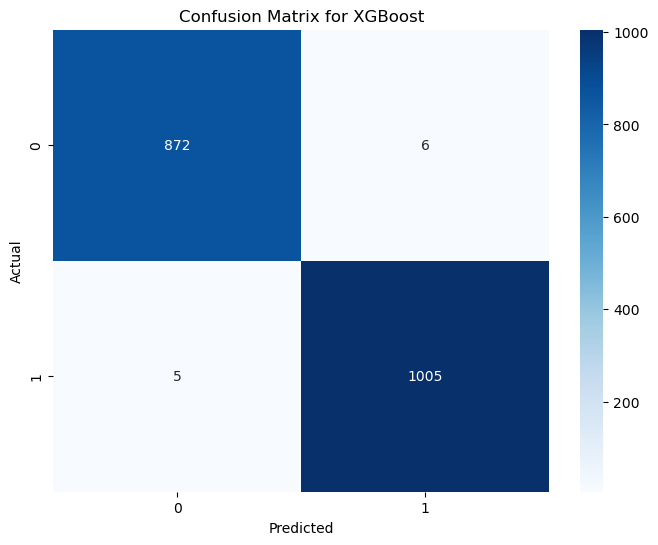

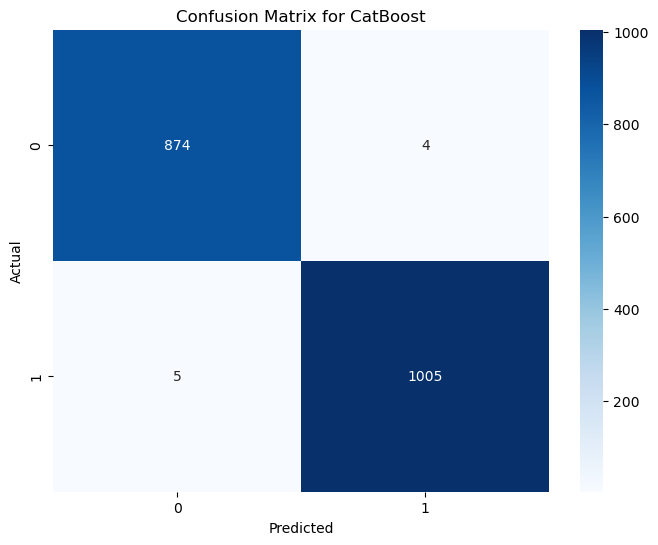

In [144]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion_matrix(y_test, predictions)
    }

for name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics["confusion_matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [164]:
for name, metrics in results.items():
    print(f"Оценки для {name}")
    print(f"Accuracy: {results[name]['accuracy']}")
    print(f"Precision: {results[name]['precision']}")
    print(f"Recall: {results[name]['recall']}")
    print(f"f1: {results[name]['f1']}")

Оценки для Logistic Regression
Accuracy: 0.9051906779661016
Precision: 0.918429003021148
Recall: 0.902970297029703
f1: 0.91063404892661
Оценки для SVM
Accuracy: 0.9009533898305084
Precision: 0.9255429162357808
Recall: 0.8861386138613861
f1: 0.9054122407688416
Оценки для Decision Tree
Accuracy: 0.9766949152542372
Precision: 0.9753937007874016
Recall: 0.9811881188118812
f1: 0.9782823297137216
Оценки для Random Forest
Accuracy: 0.9841101694915254
Precision: 0.9851485148514851
Recall: 0.9851485148514851
f1: 0.9851485148514851
Оценки для Gradient Boosting
Accuracy: 0.993114406779661
Precision: 0.9911330049261083
Recall: 0.996039603960396
f1: 0.9935802469135803
Оценки для LightGBM
Accuracy: 0.9947033898305084
Precision: 0.9940711462450593
Recall: 0.996039603960396
f1: 0.9950544015825915
Оценки для XGBoost
Accuracy: 0.9941737288135594
Precision: 0.9940652818991098
Recall: 0.995049504950495
f1: 0.9945571499257794
Оценки для CatBoost
Accuracy: 0.9952330508474576
Precision: 0.9960356788899901
Re

### Выводы 

Для решения задачи бинарной классификации(как и других задач машинного обучения) очень важна предобработка данных. Я немного изменил ее по сравнению с первым контестом, не используя StandardScaler. Теперь перейдем к непосредственным результатам.

> Лучший результат

Лучшие результаты по f1 метрике получили: 
**_CatBoost_**(_0.9955423476968797_), **_LightGBM_**(_0.9950544015825915_), **_XGBoost_**(_0.9945571499257794_)

Для сравнения мы выбираем f1 метрику благодаря тому, что именно она имеет сбалансированность между точностью и полнотой, а также устойчивость к несбалансированным классам и гибкость весов.

> Другие меры

Можем заметить, что по точности(accuracy) лучшим также стал ___CatBoost___, но бустинг и лесные модели достаточно плотно расположились.

Precision лучший снова у ___CatBoost___.

Recall же лучший показал ___LightGBM___.

Таким образом мы можем отметить, что для разных метрик лучший результат может показать разная модель, однако наиболее объективным показателем является f1 мера

>Общий вывод

Мы произвели сравнение различных моделей и даже написали свой линейный классификатор. По итогу проделанной работы можно сказать, что со своей задачей лучше всего справились модели, в реализации которых используются алгоритмы бустинга.